In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import warnings
import numpy as np

import argparse

mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")

In [4]:
dataset_name = 'flowers102'
#input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0)

qs_names = dataframe['qs'].unique()
print(qs_names.__class__)

<class 'numpy.ndarray'>


In [5]:
query_strategy_names = dataframe['qs'].unique()
print(query_strategy_names)

['RandomSampling' 'UncertaintySampling' 'DiscriminativeAL' 'CoreSet'
 'TypiClust' 'Badge']


In [6]:
result_score = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['score'].agg(['mean', 'std']).set_axis(['s_mean', 's_std'], axis=1)
result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(['t_mean', 't_std'], axis=1)
typiclust = result_time.loc['TypiClust']
print(result_time)

                                                t_mean     t_std
qs                  batch_size n_cycles step                    
Badge               16         30       0     0.060046  0.009326
                                        1     0.224673  0.012759
                                        2     0.341956  0.050294
                                        3     0.446414  0.080225
                                        4     0.515138  0.078361
...                                                ...       ...
UncertaintySampling 16         30       25    2.247410  0.738107
                                        26    2.210927  0.710487
                                        27    2.040237  0.875208
                                        28    1.953546  0.307743
                                        29    2.251380  0.571101

[180 rows x 2 columns]


In [13]:
# input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0)

query_strategy_names = dataframe['qs'].unique()

result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(
    ['t_mean', 't_std'], axis=1)
b = result_time.loc['Badge']
qs_result_t_mean = b['t_mean'].to_numpy()
print(qs_result_t_mean)

[0.06004558 0.22467275 0.34195566 0.44641447 0.51513753 0.68969326
 0.85581017 0.89014482 1.09437804 1.15913157 1.20473275 1.19466772
 1.31915832 1.68995881 1.40996699 1.74737906 1.66043377 1.59471679
 1.94862146 1.95113606 2.02832117 1.63221922 1.98264194 1.68190093
 1.89572244 2.08478885 1.83383174 1.93656111 1.95769429 2.20762434]


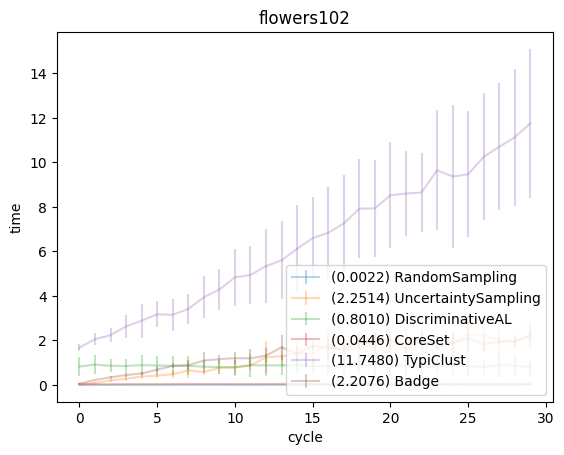

In [17]:
for qs_name in query_strategy_names:
    qs_result_t = result_time.loc[qs_name]
    qs_result_t_mean = qs_result_t['t_mean'].to_numpy()
    qs_result_t_std = qs_result_t['t_std'].to_numpy()

    plt.errorbar(np.arange(len(qs_result_t_mean)), qs_result_t_mean, qs_result_t_std,
                 label=f"({qs_result_t_mean[-1]:.4f}) {qs_name}", alpha=0.3)

plt.title(dataset_name)
plt.legend(loc='lower right')
plt.xlabel('cycle')
plt.ylabel('time')
# output_path = f'{dataset_name}_time.png'
output_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/result/{dataset_name}_time.png'
plt.savefig(output_path)